# Plot results

In [1]:
# If first time running this code on a personal computer
# using Pkg
# Pkg.instantiate()

### Script Initialization

In [2]:
# Initializing script
using LinearAlgebra
using Ipopt
using JuMP
using NLsolve
using JLD

include("./Models/dubins_free.jl")
include("./SCP/scp_problem.jl")
include("./SCP/scp_alg.jl")
include("./utils/dubins_plotting.jl")

model = DubinsFree()

DubinsFree(4, 1, Any[], Any[], Any[], 0, 0, [0.0, 0.0, 0.0], [2.0, 3.0, 0.0], 3.0, 1.0, [-100.0, -100.0, -6.283185307179586], [100.0, 100.0, 6.283185307179586], 1.0, 2.0, true, false, 0.05, Any[Any[[0.8, 2.0], 0.5]], Any[], 5000.0, 3.0, 5000.0, 1.0e6, 0.001, 0.0, 0.001)

## Fixed final angle

### Import data

In [3]:
function extract_saved_SCP_results(filename)
    d = load(filename)
    return (d["X_MC"],d["U_MC"],d["P0_MC"],d["succ_MC"],d["it_MC"],d["tr_sat_MC"],length(d["it_MC"]))
end

extract_saved_SCP_results (generic function with 1 method)

In [4]:
fn_scp = "./results/dubins/free_tf/fixed_final_theta/SCP_only.jld"
_, _, _, succ_scp, it_scp, tr_scp, N_MC = extract_saved_SCP_results(fn_scp)
println("SCP only: Success: $(sum(succ_scp)) / $N_MC, Nb. itr: mean=$(mean(it_scp))")

fn_shoot = "./results/dubins/free_tf/fixed_final_theta/SCP_shooting.jld"
_, _, _, succ_shoot, it_shoot, _, N_MC = extract_saved_SCP_results(fn_shoot)
println("Shooting: Success: $(sum(succ_shoot)) / $N_MC, Nb. itr: mean=$(mean(it_shoot))")

println("Data loaded !")

SCP only: Success: 100 / 100, Nb. itr: mean=8.06
Shooting: Success: 100 / 100, Nb. itr: mean=5.88
Data loaded !


In [5]:
sum(tr_scp)

100

### Plot

In [6]:
B_save_fig = false

false

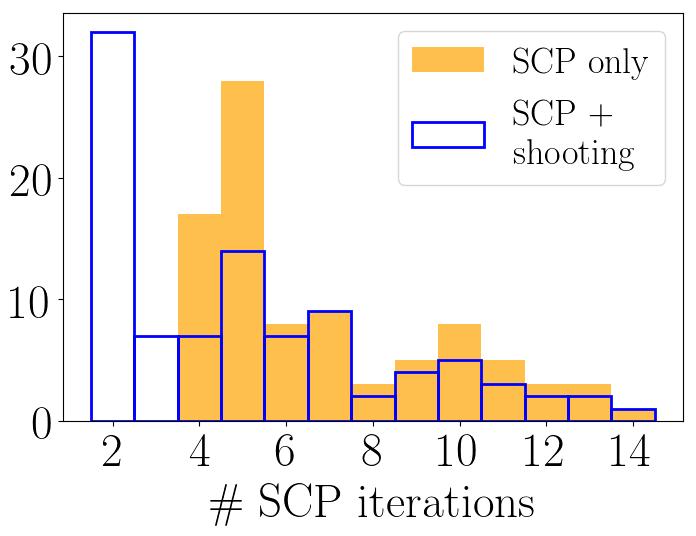

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[7]:8
└ @ Core In[7]:8


In [7]:
include("./utils/dubins_plotting.jl")
bins_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14] .+ 0.5
xticks_bins = [2,4,6,8,10,12,14] .+ 0.5

fig = plt.figure(figsize=[8,6])
fig.subplots_adjust(bottom=0.2)
PyPlot.rc("text", usetex=true)
rcParams = PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 26
rcParams["font.family"] = "Helvetica"

facecolor=(1,1,1,0)
plt.hist(it_scp,   bins_vals, normed=false, label="SCP only", alpha=0.7, color="orange")
plt.hist(it_shoot, bins_vals, normed=false, label="SCP +\nshooting", 
                                                color=facecolor,
                                                edgecolor="b", linewidth=2)

bins_vals_ticks = xticks_bins .- 0.5
plt.xticks(bins_vals_ticks, fontsize=34)
plt.yticks(fontsize=34)
# plt.grid()
plt.legend()
plt.xlabel(L"$\#$ SCP iterations", fontsize=34)

if B_save_fig
    fn_fig = "./results/dubins/free_tf/fixed_final_theta/histo_fixedThetaFinal.png"
    plt.savefig(fn_fig)
end

# Free final angle

### Import data

In [8]:
fn_scp = "./results/dubins/free_tf/free_final_theta/SCP_only.jld"
_, _, _, succ_scp, it_scp, tr_scp, N_MC = extract_saved_SCP_results(fn_scp)
println("SCP only: Success: $(sum(succ_scp)) / $N_MC, Nb. itr: mean=$(mean(it_scp))")

fn_shoot = "./results/dubins/free_tf/free_final_theta/SCP_shooting.jld"
_, _, _, succ_shoot, it_shoot, _, N_MC = extract_saved_SCP_results(fn_shoot)
println("Shooting: Success: $(sum(succ_shoot)) / $N_MC, Nb. itr: mean=$(mean(it_shoot))")

println("Data loaded !")

SCP only: Success: 100 / 100, Nb. itr: mean=8.72
Shooting: Success: 100 / 100, Nb. itr: mean=5.3
Data loaded !


### Plot

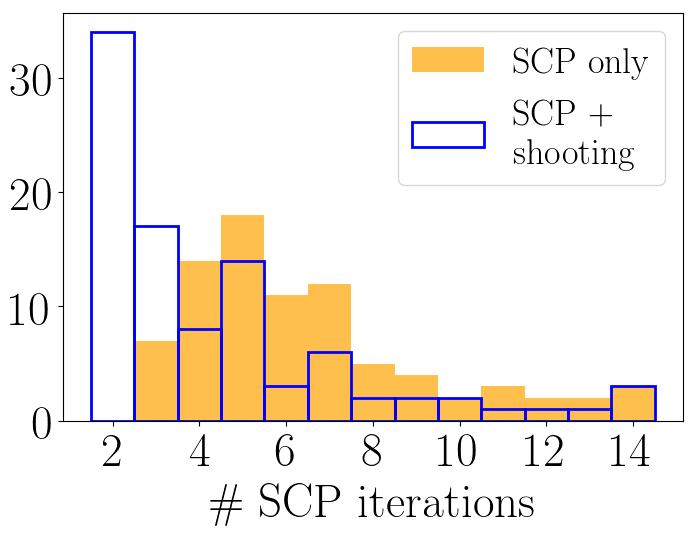

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[9]:8
└ @ Core In[9]:8


In [9]:
include("./utils/dubins_plotting.jl")
bins_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14] .+ 0.5
xticks_bins = [2,4,6,8,10,12,14] .+ 0.5

fig = plt.figure(figsize=[8,6])
fig.subplots_adjust(bottom=0.2)
PyPlot.rc("text", usetex=true)
rcParams = PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 26
rcParams["font.family"] = "Helvetica"

facecolor=(1,1,1,0)
plt.hist(it_scp,   bins_vals, normed=false, label="SCP only", alpha=0.7, color="orange")
plt.hist(it_shoot, bins_vals, normed=false, label="SCP +\nshooting", 
                                                color=facecolor,
                                                edgecolor="b", linewidth=2)

bins_vals_ticks = xticks_bins .- 0.5
plt.xticks(bins_vals_ticks, fontsize=34)
plt.yticks(fontsize=34)
# plt.grid()
plt.legend()
plt.xlabel(L"$\#$ SCP iterations", fontsize=34)

if B_save_fig
    fn_fig = "./results/dubins/free_tf/free_final_theta/histo_freeThetaFinal.png"
    plt.savefig(fn_fig)
end